In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from multipledispatch import dispatch 

def load_and_process(path):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.DataFrame(
            pd.read_csv(path)
        )
        .dropna(axis=0)
        #.shape()
    )
    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
        df1
        .drop(
            columns = ['wins', 'draws', 'loses','scored', 'missed','npxG', 'xG_diff', 'xGA_diff', 'npxGA', 'npxGD', 'xpts', 'xpts_diff']
        )
        .rename(
            columns={'Unnamed: 0': 'League', 'Unnamed: 1':'Year'}
        )
        .set_index(
            'League'
        )
        .drop(
            'RFPL'
        )
        .reset_index()
    )

    # Make sure to return the latest dataframe

    return df2

@dispatch(str, int, str)
def data_filter(league, pos, path):
    df1 = load_and_process(path)
    df2 = (
        df1[df1["League"]==league]
        )
    df3 = df2[df2['position']==pos]
    av = {'League':league+"_topTeam", 'pts': df3['pts'].mean(), 'xG':df3['xG'].mean(), 'xGA':df3['xGA'].mean(), 'ppda_coef':df3['ppda_coef'].mean(), 'oppda_coef':df3['oppda_coef'].mean(), 'deep':df3['deep'].mean(), 'deep_allowed':df3['deep_allowed'].mean()}
    return av

@dispatch(int,str)
def data_filter(pos, path):
    df1 = load_and_process(path)
    df2 = df1[df1['position']==pos]
    
    return df2

@dispatch(str, str)
def data_filter(league,path):
    df1 = load_and_process(path)
    df2 = (
        df1[df1["League"]==league]
        )
    df2 = df2.drop(
        columns = ['Year', 'position', 'team', 'matches']
    )
    av = {'League':league, 'pts': df2['pts'].mean(), 'xG':df2['xG'].mean(), 'xGA':df2['xGA'].mean(), 'ppda_coef':df2['ppda_coef'].mean(), 'oppda_coef':df2['oppda_coef'].mean(), 'deep':df2['deep'].mean(), 'deep_allowed':df2['deep_allowed'].mean()}
    
    return av

def weighted_av(path):
    df_av = pd.DataFrame(data_filter("La_liga", "../../../data/raw/understat.com.csv"), index=[0])
    df_av = df_av.append(data_filter("EPL", "../../../data/raw/understat.com.csv"), ignore_index=True)
    df_av = df_av.append(data_filter("Bundesliga", "../../../data/raw/understat.com.csv"), ignore_index=True)
    df_av = df_av.append(data_filter("Serie_A", "../../../data/raw/understat.com.csv"), ignore_index=True)
    df_av = df_av.append(data_filter("Ligue_1", "../../../data/raw/understat.com.csv"), ignore_index=True)
    
    return df_av
    

,pts,xG,xGA,ppda_coef,oppda_coef,deep,deep_allowed
League,,,,,,,
La_liga,52.225000,50.590325,50.590325,9.654516,9.654516,214.000000,214.000000
EPL,52.450000,50.762647,50.762647,11.847171,11.847171,249.566667,249.566667
Bundesliga,46.824074,48.699397,48.699397,11.170879,11.170879,202.935185,202.935185
Serie_A,52.125000,51.026213,51.026213,11.054684,11.050871,227.450000,227.450000
Ligue_1,49.758333,45.141445,45.141445,11.028938,11.032684,171.991667,171.991667


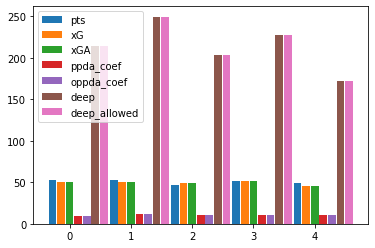

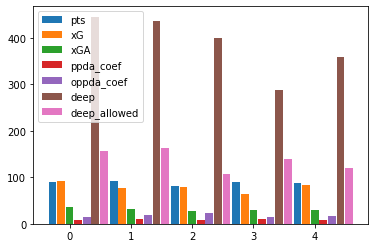

In [77]:
# df_av = pd.DataFrame(data_filter("La_liga", "../../../data/raw/understat.com.csv"), index=[0])
# df_av = df_av.append(data_filter("EPL", "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_av = df_av.append(data_filter("Bundesliga", "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_av = df_av.append(data_filter("Serie_A", "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_av = df_av.append(data_filter("Ligue_1", "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_av = df_av.set_index('League')
# display(df_av)

# df_top = pd.DataFrame(data_filter("La_liga",1, "../../../data/raw/understat.com.csv"), index=[0])
# df_top = df_top.append(data_filter("EPL",1, "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_top = df_top.append(data_filter("Bundesliga",1, "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_top = df_top.append(data_filter("Serie_A",1, "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_top = df_top.append(data_filter("Ligue_1",1, "../../../data/raw/understat.com.csv"), ignore_index=True)
# df_top = df_top.set_index('League')

# fig, ax = plt.subplots()
# bar_plot(ax, df_av, total_width=.7, single_width=0.9)
# plt.show()

# fig, ax = plt.subplots()
# bar_plot(ax, df_top, total_width=.7, single_width=0.9)
# plt.show()

weighted_av()